In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Amazon Reviews 

Use one of the following [datasets](http://jmcauley.ucsd.edu/data/amazon/) to perform sentiment analysis on the given Amazon reviews. Pick one of the "small" datasets that is a reasonable size for your computer. The goal is to create a model to algorithmically predict if a review is positive or negative just based on its text. Try to see how these reviews compare across categories. Does a review classification model for one category work for another?

## Selection

Naive Bayes will be used for these reviews, as it works with relatively small datasets and is a good classifier for sentiment. Because Naive Bayes creates a binary classifier, the sentiment for this model will either be positive or negative. The datatset for Patio, Lawn and Garden products was chosen because it is relatively small, but large enough to build a good model from.

## Load/Inspect Data

In [2]:
# import json file and inspect data
df = pd.read_json('/Users/kyleknoebel/Desktop/ThinkfulNotebooks/reviews_Patio_Lawn_and_Garden_5.json', lines=True)
df

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00002N674,"[4, 4]",4,Good USA company that stands behind their prod...,"06 21, 2011",A1JZFGZEZVWQPY,"Carter H ""1amazonreviewer@gmail . com""",Great Hoses,1308614400
1,B00002N674,"[0, 0]",5,This is a high quality 8 ply hose. I have had ...,"06 9, 2014",A32JCI4AK2JTTG,"Darryl Bennett ""Fuzzy342""",Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,1402272000
2,B00002N674,"[2, 3]",4,It's probably one of the best hoses I've ever ...,"05 5, 2012",A3N0P5AAMP6XD2,H B,Very satisfied!,1336176000
3,B00002N674,"[0, 0]",5,I probably should have bought something a bit ...,"07 15, 2013",A2QK7UNJ857YG,Jason,Very high quality,1373846400
4,B00002N674,"[1, 1]",5,I bought three of these 5/8-inch Flexogen hose...,"08 5, 2013",AS0CYBAN6EM06,jimmy,Good Hoses,1375660800
5,B00002N674,"[0, 0]",5,I aqm impressed with the cost and quality of t...,"10 18, 2012",A2UO040HWOP0C2,joe,GGGGGGGGREAT,1350518400
6,B00002N67P,"[1, 1]",5,After using this hose I will never go back to ...,"08 24, 2011",A1VGXHHR08G044,FlyingPolarBear,More powerful water flow,1314144000
7,B00002N67P,"[0, 0]",5,This is one tough hose and it is thick and sti...,"03 31, 2012",A1U6RLUA8D5DSX,Gearz,WOW This Is Tough,1333152000
8,B00002N67P,"[0, 0]",5,I'll buy more of these come Spring. Holding u...,"01 7, 2014",A2JSYW3B4KPD7I,"Juls ""gardening for life""",Love it,1389052800
9,B00002N67P,"[0, 0]",4,So far so good! I have not really had the time...,"12 13, 2013",A126CN6N93XLZU,NancyE,Flexible hose as marketed....hope it lives up ...,1386892800


The data looks pretty self-explanatory, except for the 'helpful' column. What can we learn from the data in this column?

In [3]:
# inpect the helpful column
df['helpful'].head()

0    [4, 4]
1    [0, 0]
2    [2, 3]
3    [0, 0]
4    [1, 1]
Name: helpful, dtype: object

The column appears to show two numbers in a list format. The site explains that this column shows the "helpfulness rating of the review, e.g. 2/3." This appears to give the reviews a weight depending on the content of the review. As Naive Bayes will be used in this report, this column can be disregarded. 

In [4]:
df.describe()

,overall,unixReviewTime
count,13272.000000,1.327200e+04
mean,4.186483,1.358624e+09
std,1.084114,4.709839e+07
min,1.000000,9.548928e+08
25%,4.000000,1.341965e+09
50%,5.000000,1.370304e+09
75%,5.000000,1.393546e+09
max,5.000000,1.405987e+09


This report will use 4 and above as a 'good' review and 3 and below as a 'bad' review. The value 4 was chosen for the split as the mean of the overall reviews in the dataset is very close to 4. A column will also be added to the end of the dataset to show whether a review is good or bad, with a value 1 being good and 0 being bad. 

In [5]:
# add 'good' column and populate
df['Good']=df['overall'].apply(lambda x: 1 if x>=4 else 0)
# see how many reviews of each type there are
df['Good'].value_counts()

1    10421
0     2851
Name: Good, dtype: int64

 About one quarter of the reviews are 'bad' or 0, showing that a random sample will need to be created to train the model. 

## Classifying sentiment with Naive Bayes 

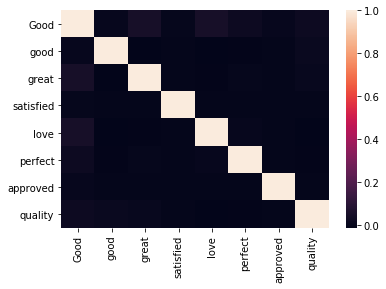

In [6]:
# create a list of keywords that show positive sentiment and 
keywords = ['good', 'great', 'satisfied', 'love', 'perfect', 'approved', 'quality']

for key in keywords:
    df[str(key)] = df.summary.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
# check for independence of keyword variables
corr=df.iloc[:, 9:].corr()
sns.heatmap(corr)

In [7]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Good,good,great,satisfied,love,perfect,approved,quality
0,B00002N674,"[4, 4]",4,Good USA company that stands behind their prod...,"06 21, 2011",A1JZFGZEZVWQPY,"Carter H ""1amazonreviewer@gmail . com""",Great Hoses,1308614400,1,False,False,False,False,False,False,False
1,B00002N674,"[0, 0]",5,This is a high quality 8 ply hose. I have had ...,"06 9, 2014",A32JCI4AK2JTTG,"Darryl Bennett ""Fuzzy342""",Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,1402272000,1,False,False,False,False,False,False,False
2,B00002N674,"[2, 3]",4,It's probably one of the best hoses I've ever ...,"05 5, 2012",A3N0P5AAMP6XD2,H B,Very satisfied!,1336176000,1,False,False,False,False,False,False,False
3,B00002N674,"[0, 0]",5,I probably should have bought something a bit ...,"07 15, 2013",A2QK7UNJ857YG,Jason,Very high quality,1373846400,1,False,False,False,False,False,False,False
4,B00002N674,"[1, 1]",5,I bought three of these 5/8-inch Flexogen hose...,"08 5, 2013",AS0CYBAN6EM06,jimmy,Good Hoses,1375660800,1,False,False,False,False,False,False,False


There is no correlation between any of the variables in the data, which shows there independence from one another. This is an ideal correlation matrix for Naive Bayes. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
# create the model and fit to the data
data = df.iloc[:, 10:]
target = df['Good']
# create training and testing vars
y=df['Good']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()
# Fit our model to the data.
bnb.fit(X_train, y_train)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
print("The accuracy of this model is {}".format(bnb.score(X_test, y_test)))

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

cross_val_score(bnb, X_train, y_train, cv=10)

The accuracy of this model is 0.7826741996233522
Number of mislabeled points out of a total 13272 points : 2851


array([0.7855127 , 0.7855127 , 0.7855127 , 0.78531073, 0.78510839,
       0.7860509 , 0.7860509 , 0.7860509 , 0.7860509 , 0.7860509 ])

This model is either extremely accurate, or extremely overfit. Since the dataset is so small, it is possible that is correctly classifying every review. What happens when tested on another dataset?

## Test Model on Toys and Games Data

In [9]:
# load data and show format
# import json file and inspect data
df2 = pd.read_json('/Users/kyleknoebel/Desktop/ThinkfulNotebooks/reviews_Toys_and_Games_5.json', lines=True)
df2

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0439893577,"[0, 0]",5,I like the item pricing. My granddaughter want...,"01 29, 2014",A1VXOAVRGKGEAK,Angie,Magnetic board,1390953600
1,0439893577,"[1, 1]",4,Love the magnet easel... great for moving to d...,"03 28, 2014",A8R62G708TSCM,Candace,it works pretty good for moving to different a...,1395964800
2,0439893577,"[1, 1]",5,Both sides are magnetic. A real plus when you...,"01 28, 2013",A21KH420DK0ICA,capemaychristy,love this!,1359331200
3,0439893577,"[0, 0]",5,Bought one a few years ago for my daughter and...,"02 8, 2014",AR29QK6HPFYZ4,dcrm,Daughters love it,1391817600
4,0439893577,"[1, 1]",4,I have a stainless steel refrigerator therefor...,"05 5, 2014",ACCH8EOML6FN5,DoyZ,Great to have so he can play with his alphabet...,1399248000
5,0439893577,"[0, 0]",3,this is a nice magnetic board for the kids to ...,"05 16, 2013",A1EDPGHC9EYBUN,kp,grandma,1368662400
6,0439893577,"[0, 0]",3,This is just as I expected. It's not too sturd...,"12 26, 2012",A181ZNB42LISRZ,laura,Serves the purpose,1356480000
7,0439893577,"[1, 1]",5,My granddaughter really really likes this. I l...,"04 15, 2014",A1RBEJ5UQ1RWAW,Linda,Great,1397520000
8,0439893577,"[0, 0]",4,This is good product to have with unlimited po...,"03 28, 2013",AFGGC7SIV964O,Maan's Mom,A must have for any homeschooling classroom !,1364428800
9,0439893577,"[59, 59]",3,I keep this board on top of the hallway table ...,"11 19, 2009",A2XU46XXNV19C8,Margaret,Nifty little thing,1258588800


In [10]:
df2.describe()

,overall,unixReviewTime
count,167597.000000,1.675970e+05
mean,4.356307,1.348759e+09
std,0.993501,6.089581e+07
min,1.000000,9.647424e+08
25%,4.000000,1.335917e+09
50%,5.000000,1.364429e+09
75%,5.000000,1.388016e+09
max,5.000000,1.406074e+09


In [11]:
# prepare dataset for modelling
# add 'good' column and populate
df2['Good']=df2['overall'].apply(lambda x: 1 if x>=4 else 0)
# see how many reviews of each type there are
df2['Good'].value_counts()

1    140235
0     27362
Name: Good, dtype: int64

The dataset has the same format as the original, so the same process will be done to prepare it for modelling. IN addition, the mean score is near enough to the original's to use the same process for labelling sentiment.

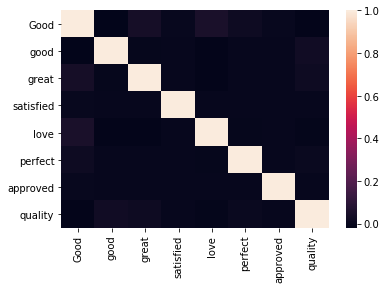

In [12]:
# create a list of keywords that show positive sentiment and 
keywords = ['good', 'great', 'satisfied', 'love', 'perfect', 'approved', 'quality']

for key in keywords:
    df2[str(key)] = df2.summary.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
# check for independence of keyword variables
corr=df2.iloc[:, 9:].corr()
sns.heatmap(corr)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
# create the model and fit to the data
data2 = df2.iloc[:, 10:]
target2=df2['Good']
# create training and testing vars
y2=df2['Good']
X2_train, X2_test, y2_train, y2_test = train_test_split(data2, y2, test_size=0.2)

# Classify, storing the result in a new variable.
y2_pred = bnb.predict(data2)
print("The accuracy of this model is {}".format(bnb.score(X2_test, y2_test)))

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y2_pred).sum()
))

cross_val_score(bnb, X2_train, y2_train, cv=10)

The accuracy of this model is 0.8382756563245823
Number of mislabeled points out of a total 167597 points : 27362


array([0.83630397, 0.83636635, 0.83636635, 0.83636635, 0.83636635,
       0.83636635, 0.83635414, 0.83635414, 0.83635414, 0.83635414])

## Summary

The scores for these models seem accurate, and the cross-validation scores show a healthy balance in teh data. The split between positive and negative sentiment was decided by the mean score of the sentiment, which may lead to the improved accuracy of the model. 

However, this method may also lead to false positives in the model. For example, some reviews with negative sentiment may have been scored overall 4, or vice versa. In order to test this, the sentiment selection should be given its own analysis and the model rerun on the new sentiment examples. 